# Image Pattern Analysis and RGB Distribution Project

This project is a comprehensive Python application that analyzes patterns in an image and shows the RGB distribution.

## 1. Importing the Required Libraries

First, we will import the libraries needed for our project.


In [9]:
import numpy as np
from PIL import Image as PILImage
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import Image as IPythonImage, display
import os

# Sonuçların kaydedileceği klasörü belirtelim
output_folder = '/Users/fatihbildirici/Desktop/Git Repos/PhDCoursesAI/PythonDataAnalysis/Week2/sonuclar'

# Sonuç klasörünü oluştur (eğer yoksa)
os.makedirs(output_folder, exist_ok=True)

## Loading and Opening the Image File

We will open the image in the specified file path.

In [10]:
# Dosya yolunu belirleyelim beraber 
file_path = '/Users/fatihbildirici/Desktop/Git Repos/PhDCoursesAI/PythonDataAnalysis/Week2/ornek_resim.jpeg'

# Görüntüyü açalım bir fraktal deseni içeren görüntümüzü
image = PILImage.open(file_path)

# Görüntüyü numpy dizisine dönüştürelim analiz edip
image_array = np.array(image)

# Görüntü boyutlarını alalım
height, width, _ = image_array.shape
print(f"Görüntü boyutları: {height}x{width}")

Görüntü boyutları: 400x640


## 3. Defining Pattern Analysis Functions

We will define functions to find the most frequent and longest repeating patterns in the image.

In [11]:
def find_most_common_patterns(image_array, pattern_size=3):
    patterns = []
    for i in range(height - pattern_size + 1):
        for j in range(width - pattern_size + 1):
            pattern = image_array[i:i+pattern_size, j:j+pattern_size].flatten()
            patterns.append(tuple(pattern))
    
    return Counter(patterns).most_common(5)

def find_longest_repeating_patterns(image_array, max_pattern_size=10):
    longest_patterns = []
    for pattern_size in range(2, max_pattern_size + 1):
        patterns = find_most_common_patterns(image_array, pattern_size)
        if patterns:
            longest_patterns.append((pattern_size, patterns[0]))
    
    return sorted(longest_patterns, key=lambda x: x[0], reverse=True)[:5]

## 4. Printing Pattern Analysis Results

Using the functions we have defined, we will find and print the most frequent and longest repeating patterns.

In [12]:
print("En sık geçen desenler:")
for pattern, count in find_most_common_patterns(image_array):
    print(f"Desen: {pattern}, Tekrar sayısı: {count}")

print("\nEn uzun tekrar eden desenler:")
for size, (pattern, count) in find_longest_repeating_patterns(image_array):
    print(f"{size}x{size} boyutunda desen, Tekrar sayısı: {count}")

En sık geçen desenler:
Desen: (np.uint8(27), np.uint8(52), np.uint8(57), np.uint8(6), np.uint8(33), np.uint8(40), np.uint8(17), np.uint8(46), np.uint8(52), np.uint8(27), np.uint8(52), np.uint8(57), np.uint8(6), np.uint8(33), np.uint8(40), np.uint8(17), np.uint8(46), np.uint8(52), np.uint8(27), np.uint8(52), np.uint8(57), np.uint8(6), np.uint8(33), np.uint8(40), np.uint8(17), np.uint8(46), np.uint8(52)), Tekrar sayısı: 3
Desen: (np.uint8(33), np.uint8(57), np.uint8(59), np.uint8(27), np.uint8(52), np.uint8(56), np.uint8(27), np.uint8(52), np.uint8(57), np.uint8(33), np.uint8(57), np.uint8(59), np.uint8(27), np.uint8(52), np.uint8(56), np.uint8(27), np.uint8(52), np.uint8(57), np.uint8(33), np.uint8(57), np.uint8(59), np.uint8(27), np.uint8(52), np.uint8(56), np.uint8(27), np.uint8(52), np.uint8(57)), Tekrar sayısı: 2
Desen: (np.uint8(27), np.uint8(52), np.uint8(56), np.uint8(27), np.uint8(52), np.uint8(57), np.uint8(6), np.uint8(33), np.uint8(40), np.uint8(27), np.uint8(52), np.uint8(56

## 5. Visualization of Patterns

We will visualize the patterns found by marking them on the image, save them and show them in the Jupyter Notebook.

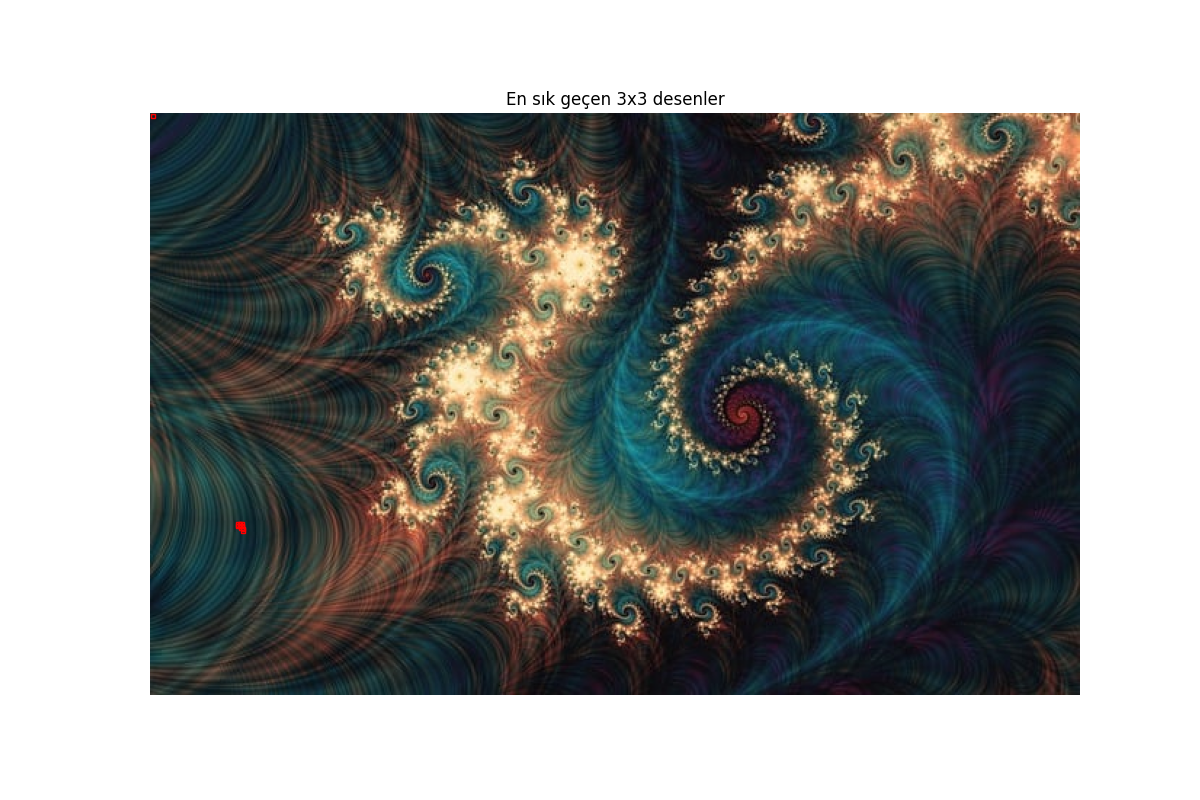

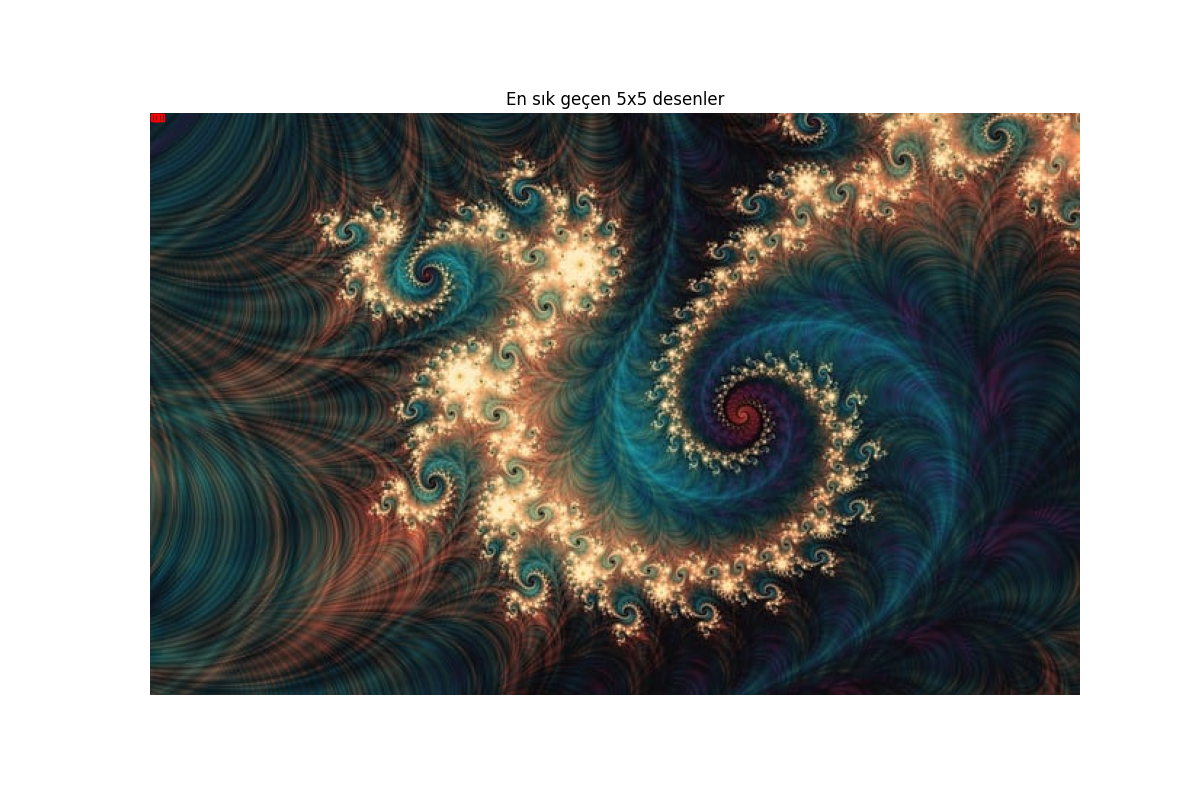

In [13]:
def visualize_and_save_patterns(image_array, patterns, pattern_size):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(image_array)
    
    for pattern, _ in patterns:
        pattern_2d = np.array(pattern).reshape(pattern_size, pattern_size, 3)
        for i in range(height - pattern_size + 1):
            for j in range(width - pattern_size + 1):
                if np.array_equal(image_array[i:i+pattern_size, j:j+pattern_size], pattern_2d):
                    rect = plt.Rectangle((j, i), pattern_size, pattern_size, 
                                         fill=False, edgecolor='red', linewidth=1)
                    ax.add_patch(rect)
    
    plt.title(f"En sık geçen {pattern_size}x{pattern_size} desenler")
    plt.axis('off')
    
    # Görseli kaydedelim bir dosyamıza
    output_file = os.path.join(output_folder, f'en_sik_gecen_{pattern_size}x{pattern_size}_desenler.png')
    plt.savefig(output_file)
    plt.close()
    
    # Kaydedilen görseli notebook'ta gösterelim kaydetme seçeneğini de buradan çıkaralım
    display(IPythonImage(filename=output_file))

# 3x3 ve 5x5 desenleri görselleştir, kaydet ve göster
visualize_and_save_patterns(image_array, find_most_common_patterns(image_array, 3), 3)
visualize_and_save_patterns(image_array, find_most_common_patterns(image_array, 5), 5)

## 6. Analysis of RGB Distribution

We will analyze the distribution of the RGB (Red, Green, Blue) channels of the image, record the results and display them on the Jupyter Notebook.

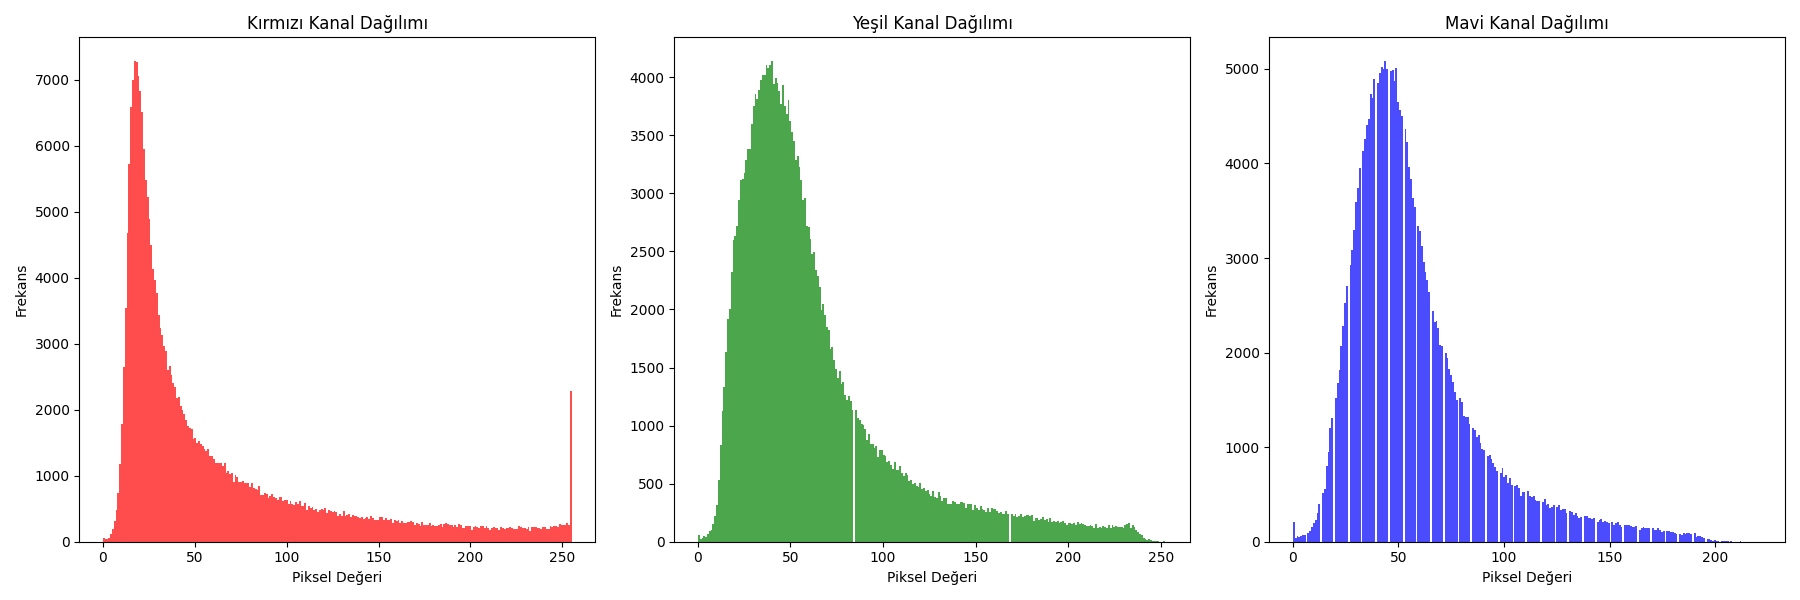

In [14]:
def visualize_and_save_rgb_distribution(image_array):
    r, g, b = image_array[:,:,0], image_array[:,:,1], image_array[:,:,2]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    ax1.hist(r.flatten(), bins=256, color='red', alpha=0.7)
    ax1.set_title('Kırmızı Kanal Dağılımı')
    ax1.set_xlabel('Piksel Değeri')
    ax1.set_ylabel('Frekans')
    
    ax2.hist(g.flatten(), bins=256, color='green', alpha=0.7)
    ax2.set_title('Yeşil Kanal Dağılımı')
    ax2.set_xlabel('Piksel Değeri')
    ax2.set_ylabel('Frekans')
    
    ax3.hist(b.flatten(), bins=256, color='blue', alpha=0.7)
    ax3.set_title('Mavi Kanal Dağılımı')
    ax3.set_xlabel('Piksel Değeri')
    ax3.set_ylabel('Frekans')
    
    plt.tight_layout()
    
    # Görseli kaydedelim
    output_file = os.path.join(output_folder, 'rgb_dagilimi.png')
    plt.savefig(output_file)
    plt.close()
    
    # Kaydedilen görseli notebook'ta gösterelim
    display(IPythonImage(filename=output_file))

# RGB dağılımını analiz edelim, kaydedelim ve gösterelim
visualize_and_save_rgb_distribution(image_array)

## 7. Visualization of the Most Frequently Recurring Patterns

Finally, we will present the most recurring patterns in a separate visualization, record them and show them in the Jupyter Notebook.

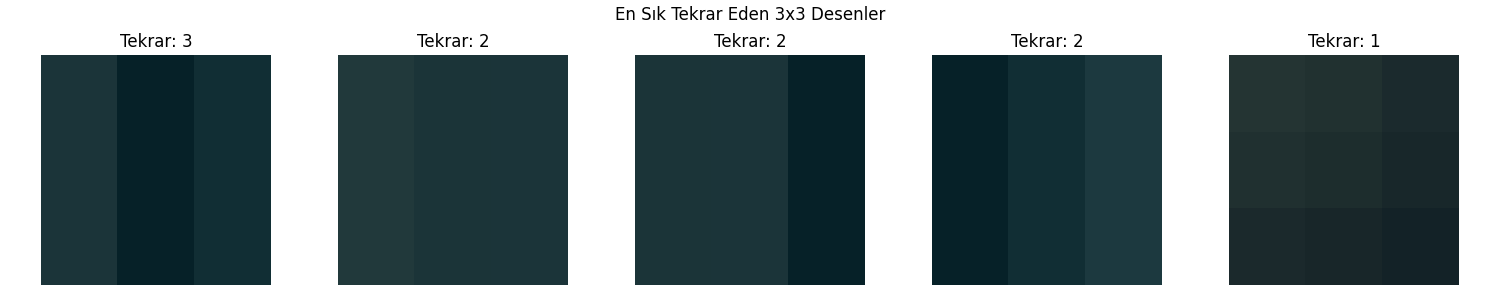

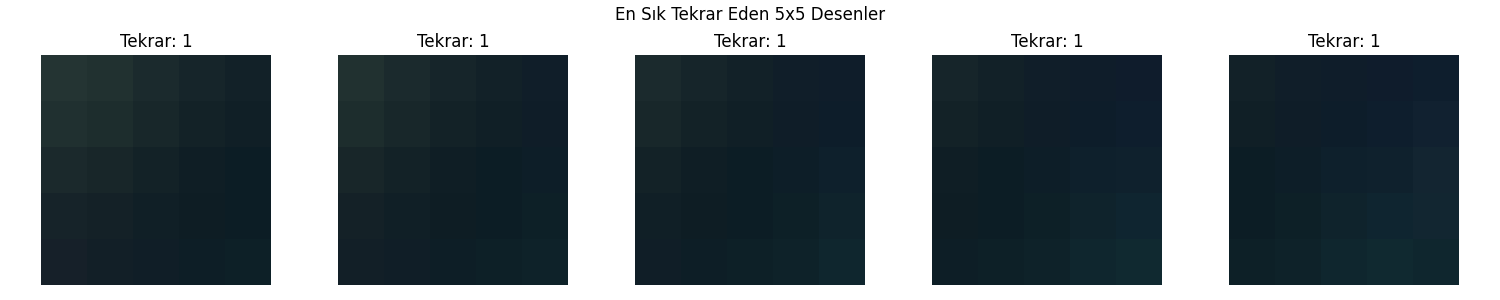

In [15]:
def visualize_and_save_common_patterns(image_array, patterns, pattern_size):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(f'En Sık Tekrar Eden {pattern_size}x{pattern_size} Desenler')
    
    for i, (pattern, count) in enumerate(patterns[:5]):
        pattern_2d = np.array(pattern).reshape(pattern_size, pattern_size, 3)
        axes[i].imshow(pattern_2d)
        axes[i].set_title(f'Tekrar: {count}')
        axes[i].axis('off')
    
    plt.tight_layout()
    
    # Görseli kaydedelim 
    output_file = os.path.join(output_folder, f'en_sik_tekrar_eden_{pattern_size}x{pattern_size}_desenler.png')
    plt.savefig(output_file)
    plt.close()
    
    # Kaydedilen görseli notebook'ta göstermeyi bir deneyelim
    display(IPythonImage(filename=output_file))

# En sık tekrar eden 3x3 ve 5x5 desenleri görselleştirelim, burada farklı alanlara da bakabiliriz
visualize_and_save_common_patterns(image_array, find_most_common_patterns(image_array, 3), 3)
visualize_and_save_common_patterns(image_array, find_most_common_patterns(image_array, 5), 5)

## 8. Conclusion

In this project, we analyzed the sample image, extracted patterns that repeat very often and printed the results of the analysis.

In [16]:
print(f"Tüm sonuçlar sonuclar klasörüne kaydedildi.")

Tüm sonuçlar sonuclar klasörüne kaydedildi.
